# K-Means Clustering Project

Jump to:
* [K Means clustering model](#kmeans)

## About the dataset

<img src="https://previews.123rf.com/images/aomeditor/aomeditor1903/aomeditor190300021/122254680-illustrator-of-body-parts-of-penguin.jpg" height='400px' width='400px'>

### <b>Columns in the dataset</b>
<ul>
    <li><b>Species: </b>penguin species (Chinstrap, Adélie, or Gentoo)</li>
    <li><b>Island: </b>island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)</li>
    <li><b>culmen_length_mm: </b>culmen length (mm)</li>
    <li><b>culmen_depth_mm: </b>culmen depth (mm)</li>
    <li><b>flipper_length_mm: </b>flipper length (mm)</li>
    <li><b>body_mass_g: </b>body mass (g)</li>
    <li><b>Sex: </b>penguin sex</li>
</ul>

In [1]:
# import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('./penguins_lter.csv')
# Check the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [3]:
data.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


# EDA

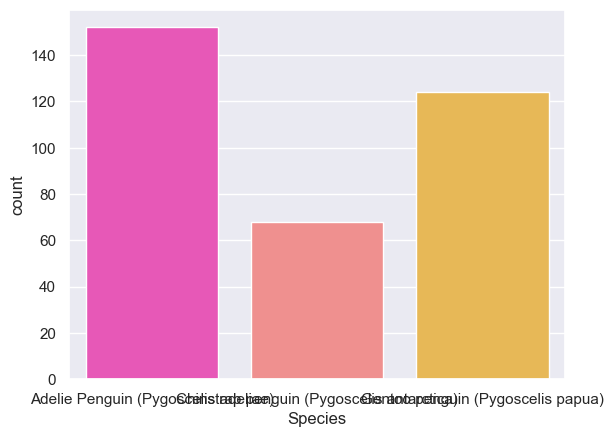

In [4]:
sns.countplot(x=data["Species"],palette='spring');

Our data is not balanced. As data is not big enough so I will not balance it.

In case of unbalanced data we can either up-sample minority class or down-sample majority class. To see an example see my following notebooks:
* [up-sampling-minority-class](https://www.kaggle.com/ayushikaushik/up-sampling-to-tackle-unbalanced-dataset)
* [down-sampling-majority-class](https://www.kaggle.com/ayushikaushik/down-sampling-majority-class-6-classification-algo)

To know cons of imbalanced data and more ways to handle it, read [this](https://elitedatascience.com/imbalanced-classes) article.

C:\Users\noemi\.conda\envs\KI-Seminarkurs\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


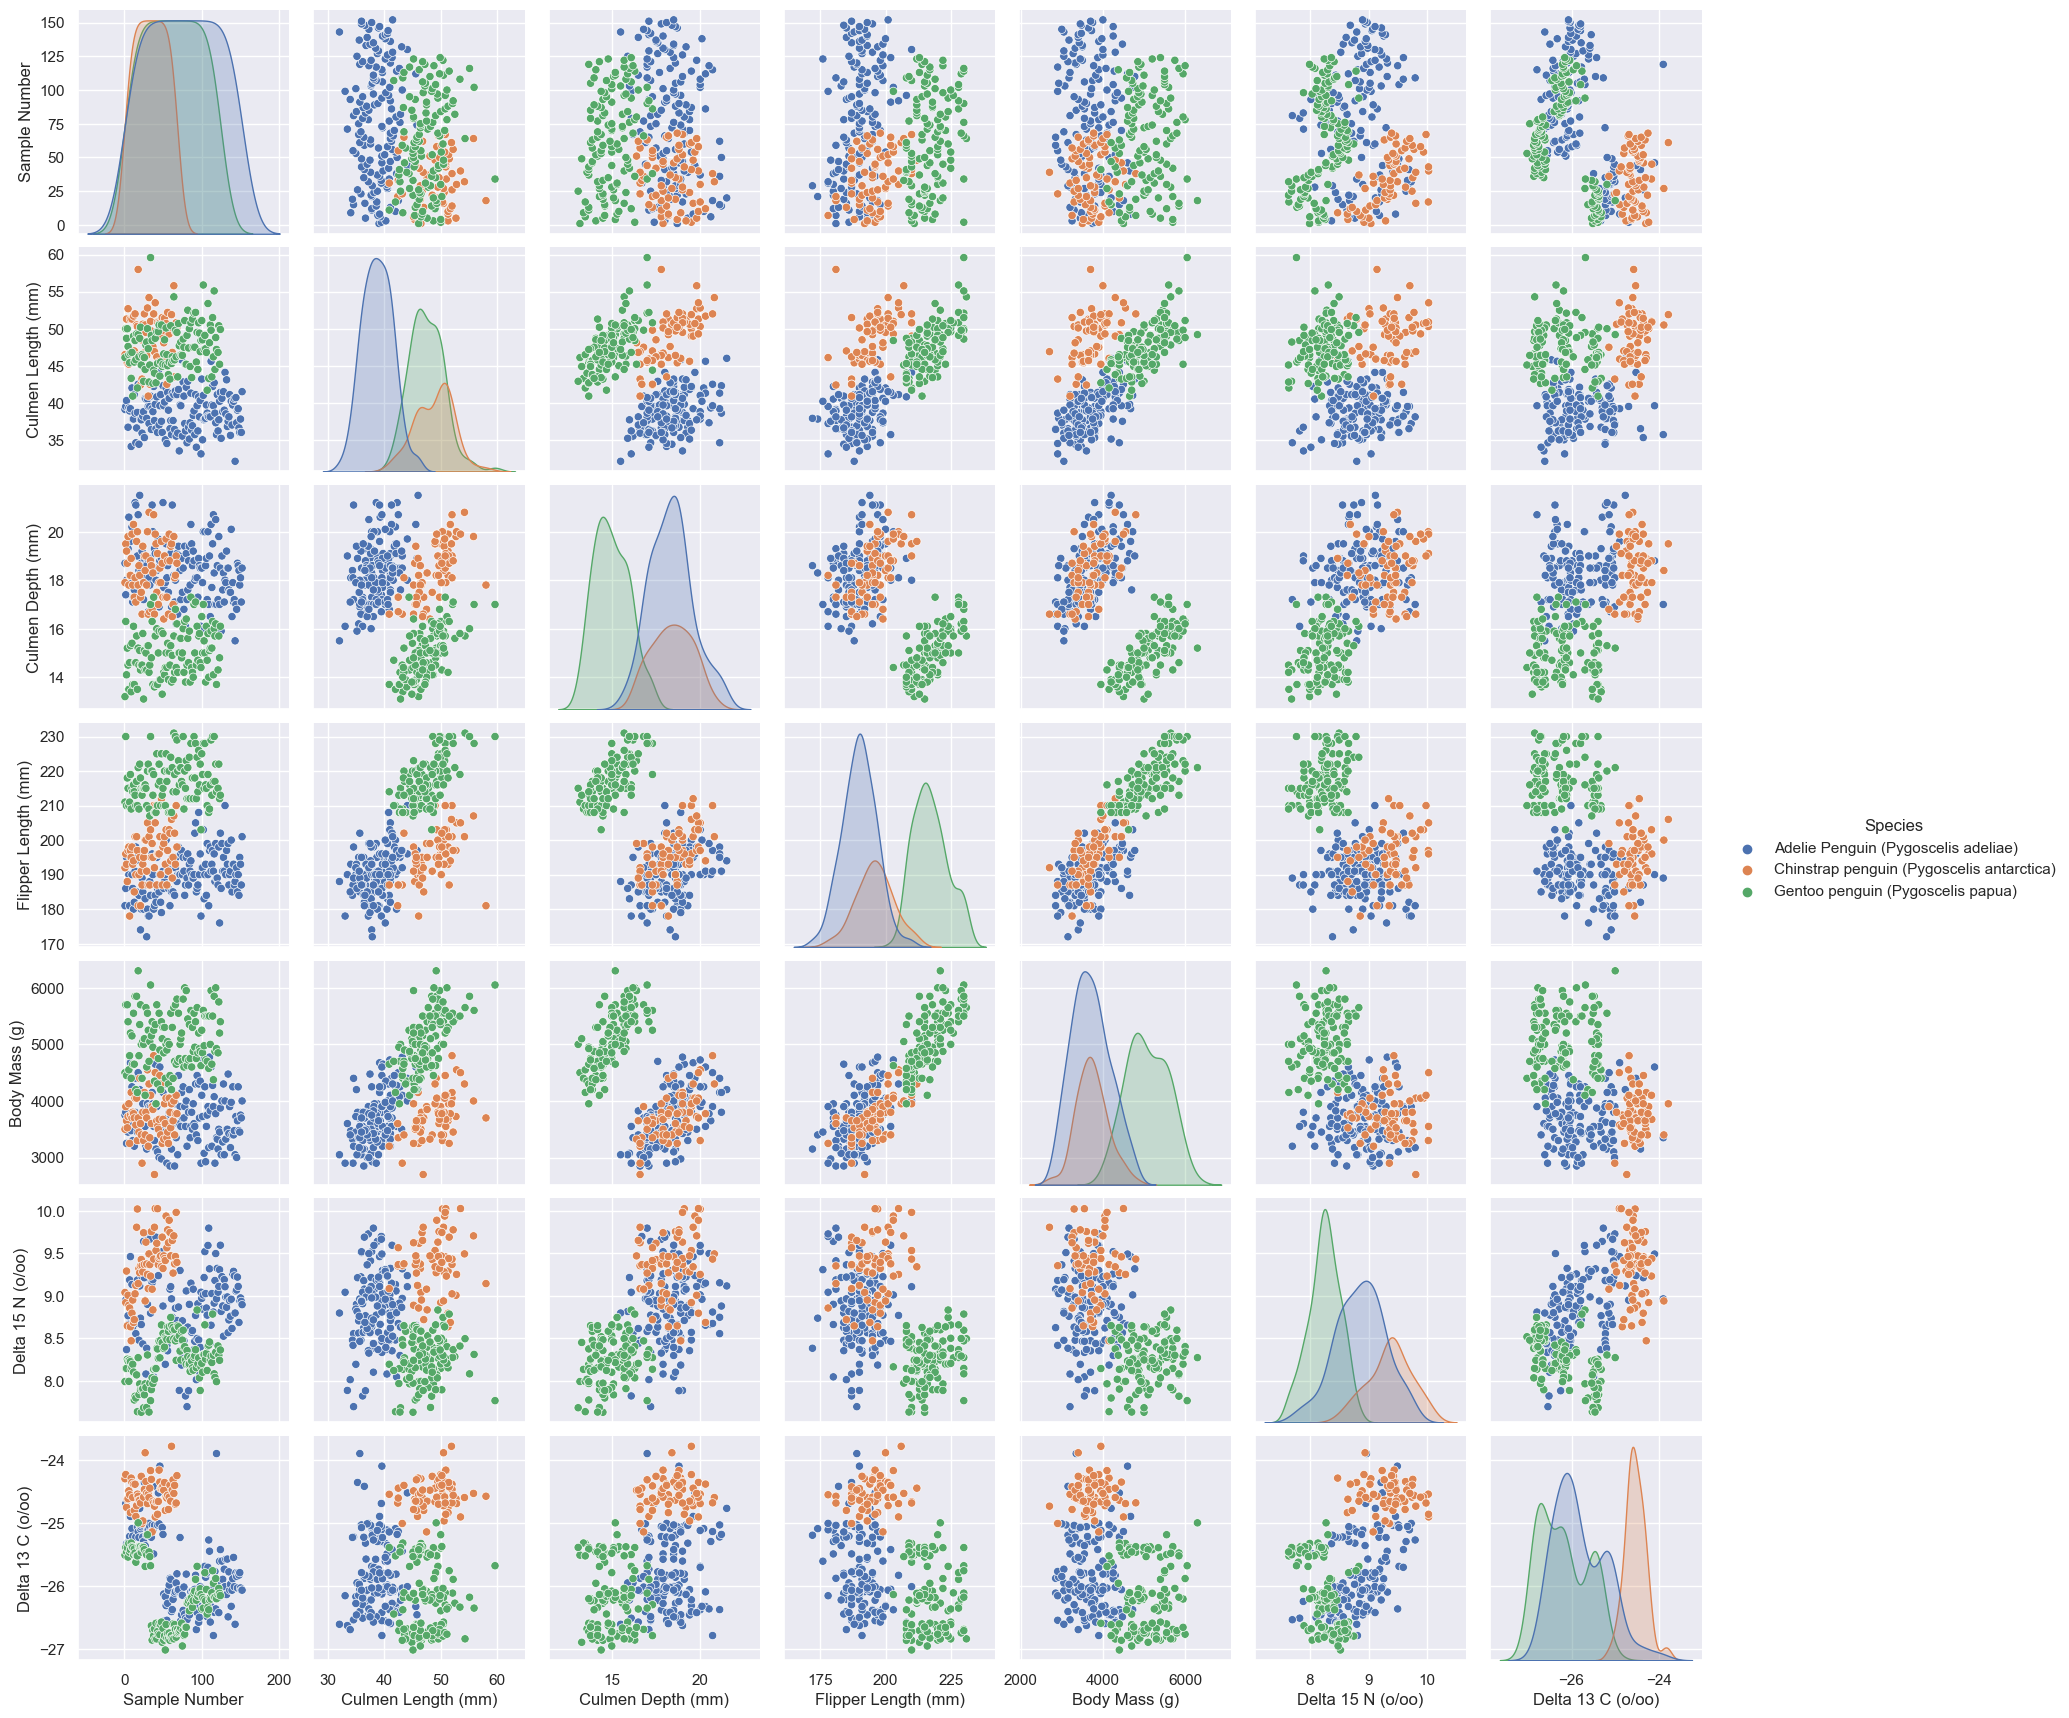

In [5]:
sns.pairplot(data,hue='Species');

We can see clusters are easily separable in the cases:
1. culmen_length_mm  vs  culmen_depth_mm ;
2. culmen_length_mm  vs  flipper_length_mm ;
3. culmen_length_mm  vs  body_mass_g.

Let's explore distribution of our data.


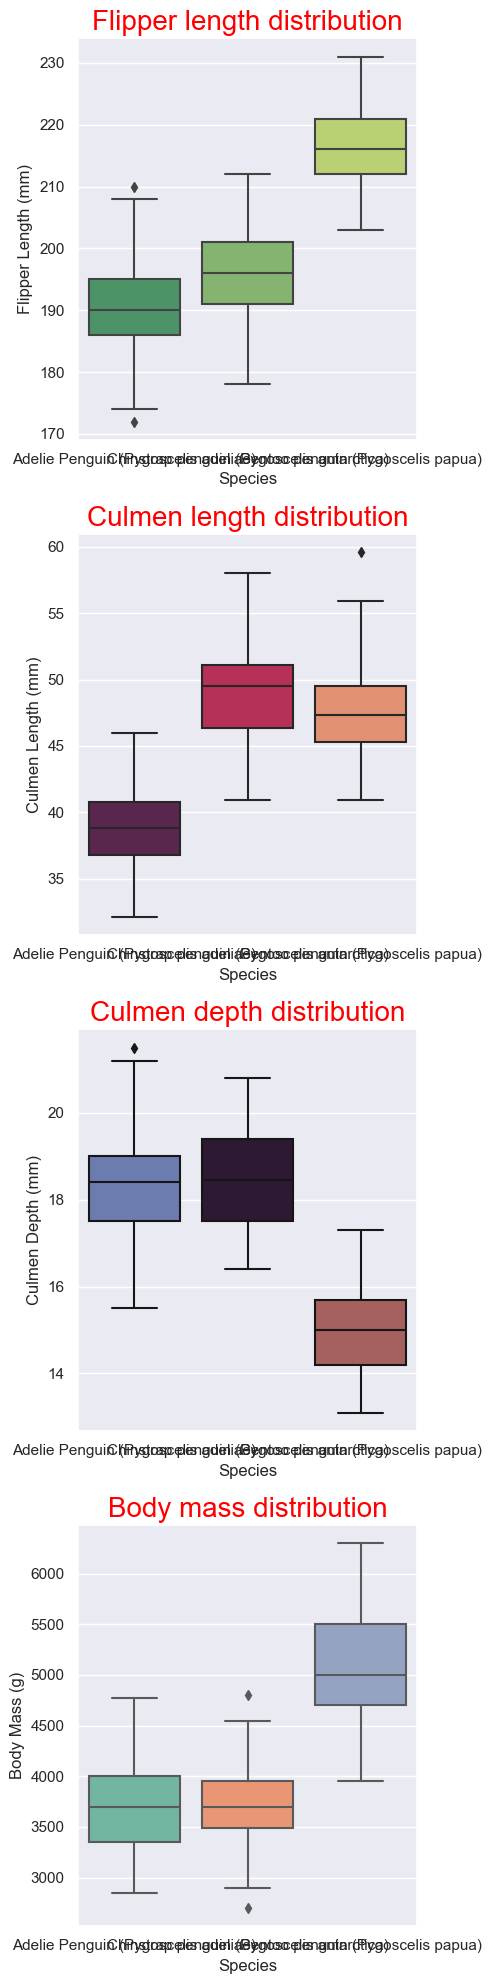

In [6]:
print("Let's explore distribution of our data.")
fig,axes=plt.subplots(4,1,figsize=(5,20))
sns.boxplot(x=data.Species,y=data["Flipper Length (mm)"],ax=axes[0],palette='summer')
axes[0].set_title("Flipper length distribution",fontsize=20,color='Red')
sns.boxplot(x=data.Species,y=data["Culmen Length (mm)"],ax=axes[1],palette='rocket')
axes[1].set_title("Culmen length distribution",fontsize=20,color='Red')
sns.boxplot(x=data.Species,y=data["Culmen Depth (mm)"],ax=axes[2],palette='twilight')
axes[2].set_title("Culmen depth distribution",fontsize=20,color='Red')
sns.boxplot(x=data.Species,y=data["Body Mass (g)"],ax=axes[3],palette='Set2')
axes[3].set_title("Body mass distribution",fontsize=20,color='Red')
plt.tight_layout();

### Dealing with missing values

Let's check out the percentage of missing values.

In [8]:
100*data.isnull().sum()/len(data)

studyName               0.000000
Sample Number           0.000000
Species                 0.000000
Region                  0.000000
Island                  0.000000
Stage                   0.000000
Individual ID           0.000000
Clutch Completion       0.000000
Date Egg                0.000000
Culmen Length (mm)      0.581395
Culmen Depth (mm)       0.581395
Flipper Length (mm)     0.581395
Body Mass (g)           0.581395
Sex                     2.906977
Delta 15 N (o/oo)       4.069767
Delta 13 C (o/oo)       3.779070
Comments               92.441860
dtype: float64

Percentage of missing data is very less. Let's impute it with median in numerical features and mode in categorical feature.
Here, I have used .fillna method from pandas library.

Missing values can also be filled using pre-defined functions like SimpleImputer from sklearn.

In [9]:
data['Sex'].fillna(data['Sex'].mode()[0],inplace=True)
col_to_be_imputed = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']
for item in col_to_be_imputed:
    data[item].fillna(data[item].mean(),inplace=True)

### Dealing with categorical features

In [10]:
data.Species.value_counts()

Species
Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: count, dtype: int64

In [11]:
data.Island.value_counts()

Island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [12]:
data.Sex.value_counts()

Sex
MALE      178
FEMALE    165
.           1
Name: count, dtype: int64

Oops! Where did this '.' entry came from?

In [13]:
data[data['Sex']=='.']

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
336,PAL0910,117,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N36A1,Yes,12/1/09,44.5,15.7,217.0,4875.0,.,8.04111,-26.18444,NaN


In [14]:
data.loc[336,'Sex'] = 'FEMALE'

In [15]:
# Target variable can also be encoded using sklearn.preprocessing.LabelEncoder
data['Species']=data['Species'].map({'Adelie Penguin (Pygoscelis adeliae)':0,'Gentoo penguin (Pygoscelis papua)':1,'Chinstrap penguin (Pygoscelis antarctica)':2})

# creating dummy variables for categorical features
#  , 'studyName', 'Region', 'Stage', 'Individual ID', 'Clutch Completion', 'Clutch Completion', 'Date Egg', 'Comments'
dummies = pd.get_dummies(data[['Island','Sex', 'Region', 'Stage']],drop_first=True)

### Standardizing feature variables.

In [16]:
# we do not standardize dummy variables 
df_to_be_scaled = data.drop(['Island','Sex', 'studyName', 'Region', 'Stage', 'Individual ID', 'Clutch Completion', 'Date Egg', 'Comments', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Sample Number'],axis=1)
target = data.Species
df_feat= df_to_be_scaled.drop('Species',axis=1)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_feat)
df_scaled = scaler.transform(df_feat)
df_scaled = pd.DataFrame(df_scaled,columns=df_feat.columns[0:4])
df_preprocessed = pd.concat([df_scaled,dummies,target],axis=1)
df_preprocessed.head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Island_Dream,Island_Torgersen,Sex_MALE,Species
0,-8.870812e-01,7.877425e-01,-1.422488,-0.565789,False,True,True,0
1,-8.134940e-01,1.265563e-01,-1.065352,-0.503168,False,True,False,0
2,-6.663195e-01,4.317192e-01,-0.422507,-1.192003,False,True,False,0
3,-1.307172e-15,1.806927e-15,0.000000,0.000000,False,True,True,0
4,-1.328605e+00,1.092905e+00,-0.565361,-0.941517,False,True,False,0


## <a id='kmeans'>K-Means Clustering</a>

It is very important to note, we actually have the labels for this data set, but we will NOT use them for the K-Means clustering algorithm, since that is an **unsupervised learning algorithm**. K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid. The main objective of the K-Means algorithm is to minimize the sum of distances between the points and their respective cluster centroid.

K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data. In k means clustering, we have to specify the ***number of clusters k*** we want the data to be grouped into.

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

kmeans = KMeans(3,init='k-means++')
kmeans.fit(df_preprocessed.drop('Species',axis=1))

C:\Users\noemi\.conda\envs\KI-Seminarkurs\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [19]:
print(confusion_matrix(df_preprocessed.Species,kmeans.labels_))

[[141   0  11]
 [  0 123   1]
 [  5   0  63]]


In [20]:
print(classification_report(df_preprocessed.Species,kmeans.labels_))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       152
           1       1.00      0.99      1.00       124
           2       0.84      0.93      0.88        68

    accuracy                           0.95       344
   macro avg       0.94      0.95      0.94       344
weighted avg       0.95      0.95      0.95       344



In [21]:
f"Accuracy is {np.round(100*accuracy_score(df_preprocessed.Species,kmeans.labels_),2)}%"

'Accuracy is 95.06%'

C:\Users\noemi\.conda\envs\KI-Seminarkurs\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\noemi\.conda\envs\KI-Seminarkurs\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\noemi\.conda\envs\KI-Seminarkurs\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\noemi\.conda\envs\KI-Seminarkurs\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default valu

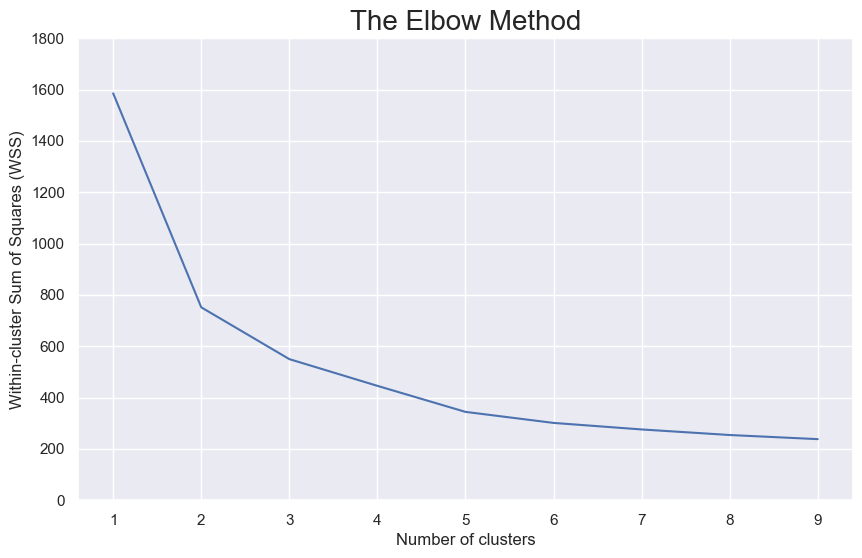

In [22]:
wcss=[]
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(df_preprocessed.drop('Species',axis=1))
    pred_i = kmeans.labels_
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1,10),wcss)
plt.ylim([0,1800])
plt.title('The Elbow Method',{'fontsize':20})
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares (WSS)');

We can observe from graph that as k goes from 1 to 3 there is a steep decline in wcss. As k increases further decrease in k becomes linear. So, k=3 is a good choice. This also makes sense, as the number of penguin species is 3. 